## This report is focused on exploratory data analysis of stock prices from 2008 to 2015. In this  report we will be analysing the bank stocks and will notice the trend that how they progressed from financial crisis to early 2016. 

In [13]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set(style= "whitegrid") 

from pandas_datareader import data, wb

import datetime

%matplotlib inline


from plotly import __version__
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

In [15]:
df = pd.read_pickle("all_banks.csv")

In [16]:
df.head(1)

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   

Bank Ticker             ...        MS                                 WFC  \
Stock Info    Volume    ...      Open   High    Low  Close   Volume  Open   
Date                    ...                                                 
2006-01-03   1537660    ...     57.17  58.49  56.74  58.31  5377000  31.6   

Bank Ticker                               
Stock Info    High   Low Close    Volume  
Date                                      
2006-01-03   31.98  31.2  31.9  11016400  

[1 rows x 30 columns]

In [17]:
df.nunique()

Bank Ticker  Stock Info
BAC          Open          1505
             High          1508
             Low           1517
             Close         1522
             Volume        2517
C            Open          1750
             High          1724
             Low           1726
             Close         1790
             Volume        2517
GS           Open          2200
             High          2174
             Low           2198
             Close         2247
             Volume        2515
JPM          Open          1744
             High          1729
             Low           1749
             Close         1768
             Volume        2517
MS           Open          1866
             High          1899
             Low           1922
             Close         1902
             Volume        2516
WFC          Open          1603
             High          1587
             Low           1619
             Close         1601
             Volume        2517
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2006-01-03 to 2015-12-31
Data columns (total 30 columns):
(BAC, Open)      2517 non-null float64
(BAC, High)      2517 non-null float64
(BAC, Low)       2517 non-null float64
(BAC, Close)     2517 non-null float64
(BAC, Volume)    2517 non-null int64
(C, Open)        2517 non-null float64
(C, High)        2517 non-null float64
(C, Low)         2517 non-null float64
(C, Close)       2517 non-null float64
(C, Volume)      2517 non-null int64
(GS, Open)       2517 non-null float64
(GS, High)       2517 non-null float64
(GS, Low)        2517 non-null float64
(GS, Close)      2517 non-null float64
(GS, Volume)     2517 non-null int64
(JPM, Open)      2517 non-null float64
(JPM, High)      2517 non-null float64
(JPM, Low)       2517 non-null float64
(JPM, Close)     2517 non-null float64
(JPM, Volume)    2517 non-null int64
(MS, Open)       2517 non-null float64
(MS, High)       2517 non-null float64
(MS, Low)        2517 non

In [19]:
df.describe()

Bank Ticker          BAC                                                       \
Stock Info          Open         High          Low        Close        Volume   
count        2517.000000  2517.000000  2517.000000  2517.000000  2.517000e+03   
mean           22.205217    22.479182    21.894076    22.174617  1.333590e+08   
std            15.308041    15.406193    15.197964    15.304852  1.274974e+08   
min             3.220000     3.510000     2.530000     3.140000  4.836000e+06   
25%            12.310000    12.450000    12.130000    12.270000  4.845598e+07   
50%            15.780000    15.970000    15.600000    15.790000  1.015867e+08   
75%            32.730000    33.600000    31.750000    32.630000  1.752694e+08   
max            55.040000    55.080000    54.820000    54.900000  1.226791e+09   

Bank Ticker            C                                                       \
Stock Info          Open         High          Low        Close        Volume   
count        2517.000000  2517.000000  2517.000000  2517.000000  2.517000e+03   
mean          145.661124   147.401685   143.602412   145.372658  2.859715e+07   
std           177.547336   178.987879   175.987635   177.409683  2.982102e+07   
min             4.550000     0.000000     4.500000     4.520000  6.328600e+05   
25%            39.500000    40.090000    38.780000    39.380000  1.008514e+07   
50%            49.430000    49.920000    48.890000    49.390000  2.183961e+07   
75%           197.400000   204.600000   190.400000   196.900000  3.878944e+07   
max           566.000000   570.000000   555.500000   564.100000  5.131787e+08   

Bank Ticker      ...                MS                                         \
Stock Info       ...              Open         High          Low        Close   
count            ...       2517.000000  2517.000000  2517.000000  2517.000000   
mean             ...         36.022133    36.559186    35.443925    36.006198   
std              ...         18.666122    18.815168    18.516753    18.669476   
min              ...          9.190000    10.210000     6.710000     9.200000   
25%              ...         23.800000    24.460000    23.270000    23.870000   
50%              ...         30.400000    30.790000    29.960000    30.340000   
75%              ...         40.110000    41.050000    39.590000    40.210000   
max              ...         90.770000    90.950000    88.330000    89.300000   

Bank Ticker                        WFC                                         \
Stock Info         Volume         Open         High          Low        Close   
count        2.517000e+03  2517.000000  2517.000000  2517.000000  2517.000000   
mean         1.764023e+07    35.600727    36.015542    35.169110    35.598411   
std          1.690477e+07    10.010587     9.928720    10.105723    10.012581   
min          1.120500e+06     8.650000     8.940000     7.800000     8.120000   
25%          8.676259e+06    28.410000    28.990000    27.950000    28.490000   
50%          1.391242e+07    33.410000    33.890000    33.020000    33.500000   
75%          2.164847e+07    41.060000    41.420000    40.790000    41.220000   
max          3.297860e+08    58.730000    58.760000    58.070000    58.520000   

Bank Ticker                
Stock Info         Volume  
count        2.517000e+03  
mean         3.293280e+07  
std          3.572992e+07  
min          2.392000e+06  
25%          1.381537e+07  
50%          2.317952e+07  
75%          3.796472e+07  
max          4.787366e+08  

[8 rows x 30 columns]

In [20]:
# Creating Start and End Date for individual tickers:

In [21]:
start = datetime.datetime(2006,1,1)
end = datetime.datetime(2016,1,1)

In [22]:
# Reading the individual ticker data from yahoo finance:

BAC = data.DataReader("BAC", "yahoo", start, end)

C = data.DataReader("C", "yahoo", start, end)

GS = data.DataReader("GS", "yahoo", start, end)

JPM = data.DataReader("JPM", "yahoo", start, end)

MS = data.DataReader("MS", "yahoo", start, end)

WFC = data.DataReader("WFC", "yahoo", start, end)




In [23]:
# Creating a list of tickers for future refrence:
tickers = ["BAC", "C", "GS", "JPM", "MS", "WFC"]

In [24]:
# Creating a Bank Stock DF:
bank_stock = pd.concat([BAC, C, GS, JPM, MS, WFC], axis=1, keys= tickers )

In [25]:
bank_stock.columns.names= ["Bank Ticker", "Stock Info"]

In [26]:
bank_stock.head(1)

Bank Ticker    BAC                                                          \
Stock Info    High        Low       Open      Close      Volume  Adj Close   
Date                                                                         
2006-01-03   47.18  46.150002  46.919998  47.080002  16296700.0  36.535149   

Bank Ticker           C                                   ...             MS  \
Stock Info         High         Low   Open       Close    ...           Open   
Date                                                      ...                  
2006-01-03   493.799988  481.100006  490.0  492.899994    ...      57.169998   

Bank Ticker                                      WFC                      \
Stock Info       Close     Volume  Adj Close    High     Low  Open Close   
Date                                                                       
2006-01-03   58.310001  5377000.0  39.379498  31.975  31.195  31.6  31.9   

Bank Ticker                         
Stock Info       Volume  Adj Close  
Date                                
2006-01-03   11016400.0  22.067434  

[1 rows x 36 columns]

# Basic Q/A

In [27]:
# Lowest and Highest stock Close price for Bank of Ameria:
print (bank_stock["BAC"]["Close"].min() , ",", bank_stock["BAC"]["Close"].max())

3.140000104904175 , 54.900001525878906


In [28]:
# The max Close price for each bank's stock throughout the time period
for tick in tickers:
    print (tick + ":",  bank_stock[tick]["Close"].max())
    
#OR 
bank_stock.xs(key="Close", axis=1, level="Stock Info").max()

BAC: 54.900001525878906
C: 564.0999755859375
GS: 247.9199981689453
JPM: 70.08000183105469
MS: 89.30000305175781
WFC: 58.52000045776367


Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

In [29]:
# Creating a Return Data Frame for all individual banks stocks: 
returns = pd.DataFrame()
for tick in tickers: 
    returns[tick + " Return"] = bank_stock[tick]["Close"].pct_change()
    
returns.head(4)

BAC Return  C Return  GS Return  JPM Return  MS Return  WFC Return
Date                                                                          
2006-01-03         NaN       NaN        NaN         NaN        NaN         NaN
2006-01-04   -0.010620 -0.018462  -0.013812   -0.014183   0.000686   -0.011599
2006-01-05    0.001288  0.004961  -0.000393    0.003029   0.002742   -0.001110
2006-01-06   -0.001501  0.000000   0.014169    0.007046   0.001025    0.005874

In [30]:
# Creating a pair Plot for returns: 

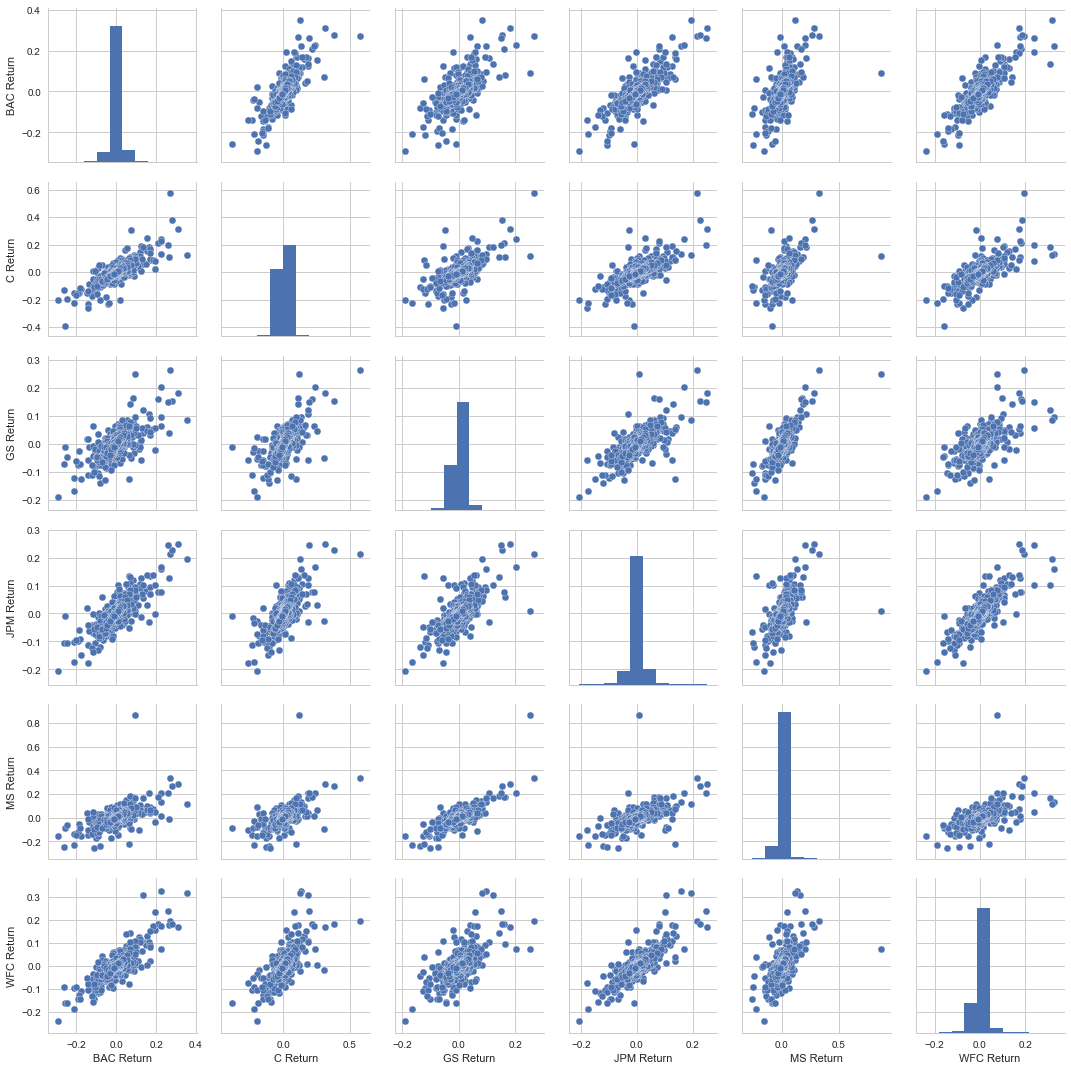

In [31]:
sns.pairplot(returns[1:] )

In [32]:
returns.head(4)

BAC Return  C Return  GS Return  JPM Return  MS Return  WFC Return
Date                                                                          
2006-01-03         NaN       NaN        NaN         NaN        NaN         NaN
2006-01-04   -0.010620 -0.018462  -0.013812   -0.014183   0.000686   -0.011599
2006-01-05    0.001288  0.004961  -0.000393    0.003029   0.002742   -0.001110
2006-01-06   -0.001501  0.000000   0.014169    0.007046   0.001025    0.005874

In [33]:
# dates each bank stock had the best and worst single day returns. 
print(returns.idxmax())

returns.idxmin()


BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]


BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [34]:
# Standard Deviation of the stocks price from year 2006 to 2016 indually:

# over all standard deviation of returns: 
print("over all standard deviation of returns")
print (returns.std())
print("\n")

# standard deviation of returns in year 2006:
print("standard deviation of returns in year 2006")
print (returns.ix["2006-01-01" : "2006-12-31 "].std())
print("\n")

# standard deviation of returns in year 2007:
print("standard deviation of returns in year 2007")
print(returns.ix["2007-01-01" : "2007-12-31 "].std())
print("\n")

# standard deviation of returns in year 2008:
print("standard deviation of returns in year 2008")
print(returns.ix["2008-01-01" : "2008-12-31 "].std())
print("\n")

# standard deviation of returns in year 2009:
print("standard deviation of returns in year 2009")
print(returns.ix["2009-01-01" : "2009-12-31 "].std())
print("\n")

# standard deviation of returns in year 2010:
print("standard deviation of returns in year 2010")
print(returns.ix["2010-01-01" : "2010-12-31 "].std())
print("\n")

# standard deviation of returns in year 2011:
print("standard deviation of returns in year 2011")
print(returns.ix["2011-01-01" : "2011-12-31 "].std())
print("\n")

# standard deviation of returns in year 2012:
print("standard deviation of returns in year 2012")
print(returns.ix["2012-01-01" : "2012-12-31 "].std())
print("\n")


# standard deviation of returns in year 2013:
print("standard deviation of returns in year 2013")
print(returns.ix["2013-01-01" : "2013-12-31 "].std())
print("\n")


# standard deviation of returns in year 2014:
print("standard deviation of returns in year 2014")
print(returns.ix["2014-01-01" : "2014-12-31 "].std())
print("\n")

# standard deviation of returns in year 2015:
print("standard deviation of returns in year 2015")
print(returns.ix["2015-01-01" : "2015-12-31 "].std())
print("\n")


over all standard deviation of returns
BAC Return    0.036647
C Return      0.038672
GS Return     0.025390
JPM Return    0.027667
MS Return     0.037819
WFC Return    0.030238
dtype: float64


standard deviation of returns in year 2006
BAC Return    0.008008
C Return      0.009075
GS Return     0.014838
JPM Return    0.010738
MS Return     0.012648
WFC Return    0.008163
dtype: float64


standard deviation of returns in year 2007
BAC Return    0.013765
C Return      0.018278
GS Return     0.021849
JPM Return    0.016821
MS Return     0.024866
WFC Return    0.016990
dtype: float64


standard deviation of returns in year 2008
BAC Return    0.062934
C Return      0.073523
GS Return     0.050015
JPM Return    0.053134
MS Return     0.087604
WFC Return    0.052439
dtype: float64


standard deviation of returns in year 2009
BAC Return    0.077839
C Return      0.079363
GS Return     0.038187
JPM Return    0.051184
MS Return     0.051127
WFC Return    0.066828
dtype: float64


standard devia

/Users/keshavrastogi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



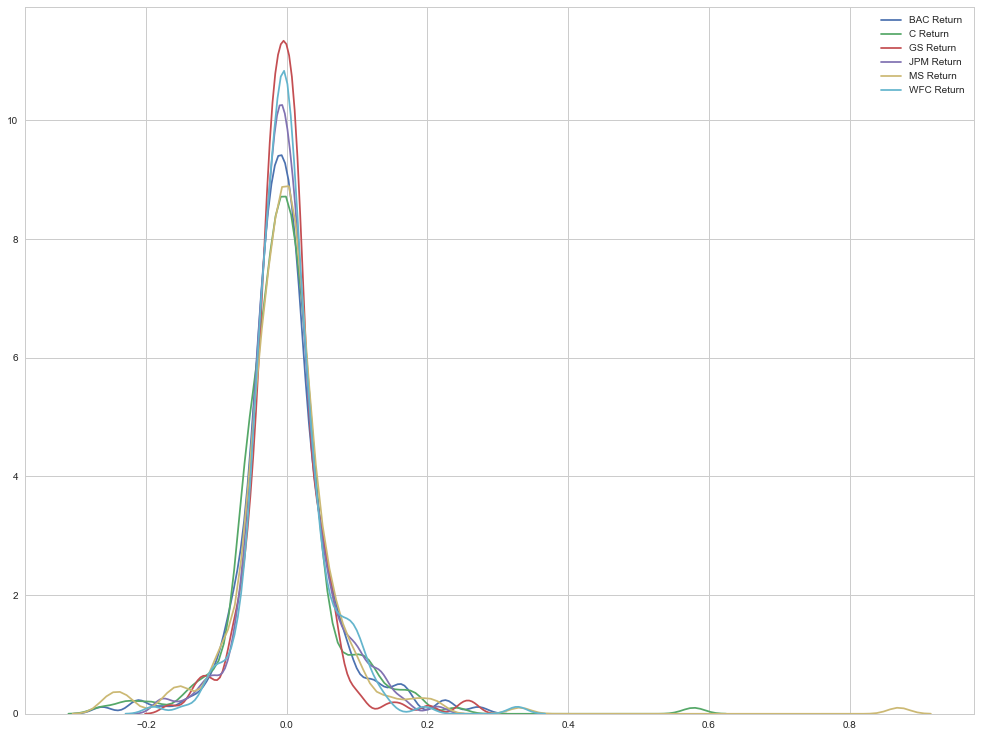

In [35]:
plt.figure(figsize=(17,13))

for tick in returns:
    sns.kdeplot(returns.ix["2008-01-01" : "2008-12-31 "][tick])

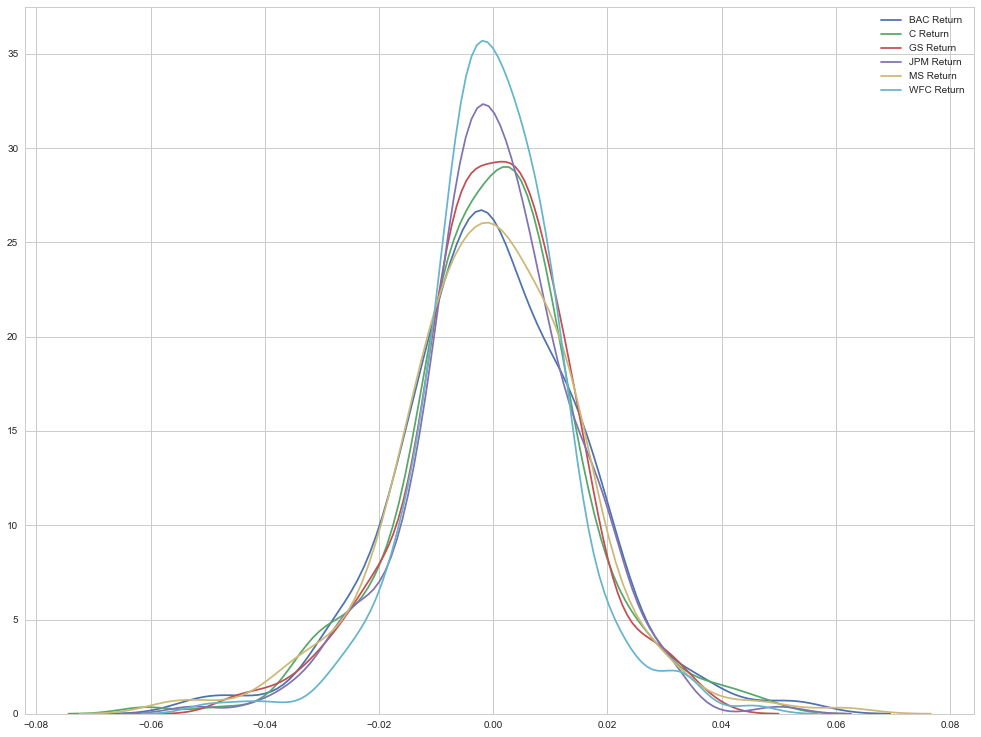

In [36]:
plt.figure(figsize=(17,13))

for tick in returns:
    sns.kdeplot(returns.ix["2015-01-01" : "2015-12-31 "][tick])

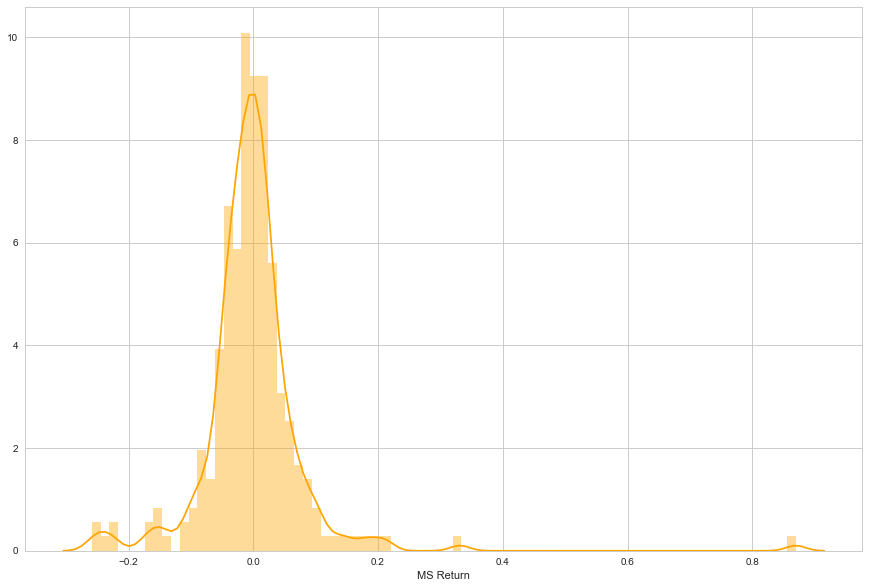

In [37]:
plt.figure(figsize=(15,10))
sns.distplot(returns.ix["2008-01-01" : "2008-12-31 "]["MS Return"], color="orange", bins=80)


In [38]:
sns.displot

AttributeError: module 'seaborn' has no attribute 'displot'

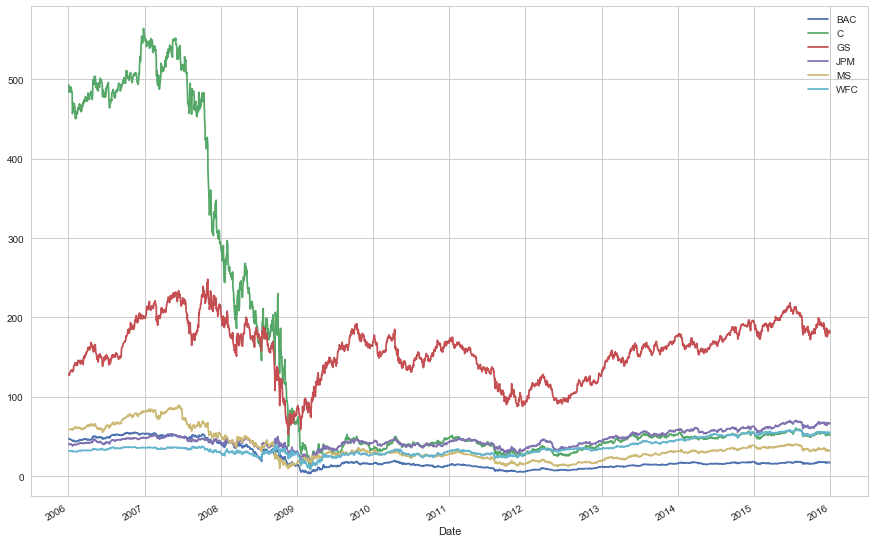

In [39]:
'''bank_stock.xs(key = "Close", axis = 1, level = "Stock Info").plot()'''
for tick in tickers: 
    bank_stock[tick]["Close"].plot(label = tick, figsize = (15,10))
plt.legend()

In [40]:
bank_stock.xs(key = "Close", axis = 1, level = "Stock Info").iplot()

/Users/keshavrastogi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



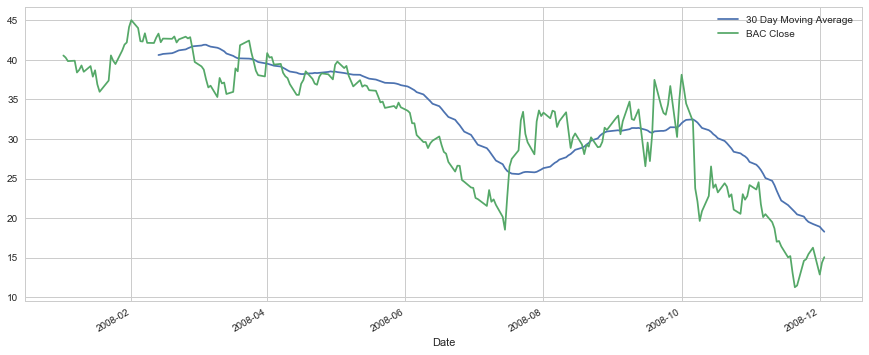

In [41]:
plt.figure(figsize=(15,6))
BAC.ix["2008-01-01" : "2008-12-3"]["Close"].rolling (window = 30).mean().plot(label = "30 Day Moving Average")
BAC.ix["2008-01-01" : "2008-12-3"]["Close"].plot(label = "BAC Close")
plt.legend()


In [42]:
'''
plt.figure(figsize=(15,5))
for tick in tickers:
    df[tick].loc["2008-01-01" : "2008-12-3"]["Close"].rolling(window=30).mean().iplot()
    df[tick].loc["2008-01-01" : "2008-12-3"]["Close"].iplot()
    
for tick in tickers:
   
    bank_stock[tick]["Close"].iplot(color = "green", title = tick)
'''

'\nplt.figure(figsize=(15,5))\nfor tick in tickers:\n    df[tick].loc["2008-01-01" : "2008-12-3"]["Close"].rolling(window=30).mean().iplot()\n    df[tick].loc["2008-01-01" : "2008-12-3"]["Close"].iplot()\n    \nfor tick in tickers:\n   \n    bank_stock[tick]["Close"].iplot(color = "green", title = tick)\n'

In [43]:
returns.corr()

BAC Return  C Return  GS Return  JPM Return  MS Return  WFC Return
BAC Return    1.000000  0.802752   0.685271    0.815410   0.643840    0.828337
C Return      0.802752  1.000000   0.668989    0.739045   0.634352    0.717386
GS Return     0.685271  0.668989   1.000000    0.738671   0.805155    0.662847
JPM Return    0.815410  0.739045   0.738671    1.000000   0.646711    0.826276
MS Return     0.643840  0.634352   0.805155    0.646711   1.000000    0.598681
WFC Return    0.828337  0.717386   0.662847    0.826276   0.598681    1.000000

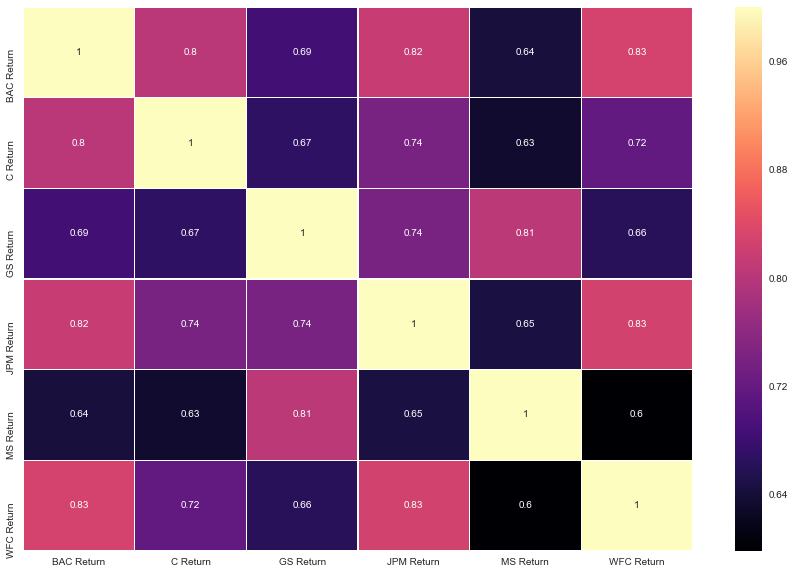

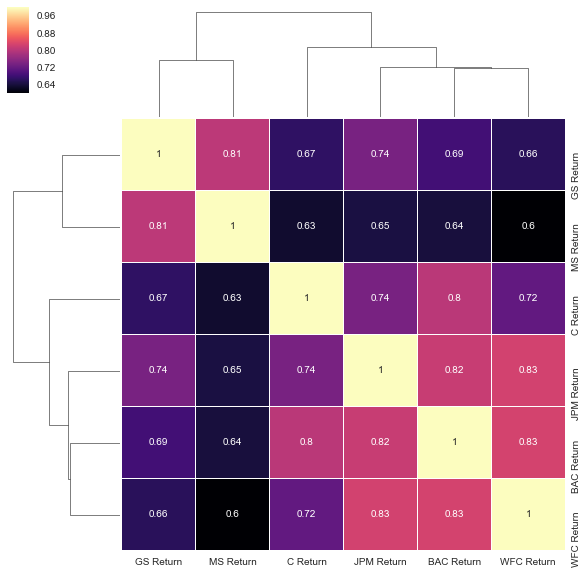

In [44]:
# Heatmap for return of all the banks
plt.figure(figsize=(15,10))
sns.heatmap(returns.corr(), cmap="magma",linewidths=.1, annot= True)


sns.clustermap(returns.corr(), cmap="magma",linewidths=.1, annot= True)

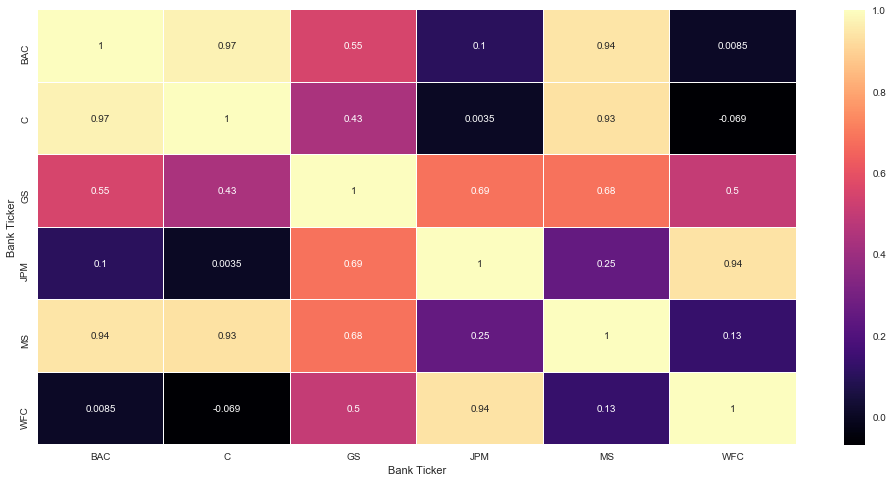

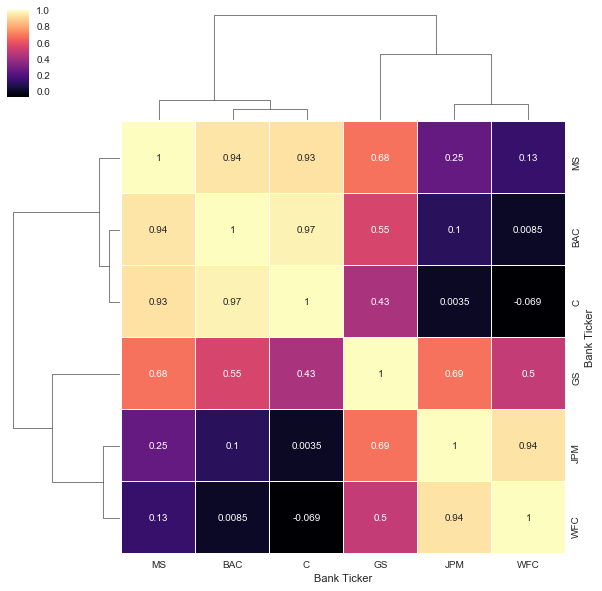

In [45]:
# heatmap for closing prices for all the banks:
plt.figure(figsize = (17,8))
sns.heatmap(bank_stock.xs(key= "Close", axis = 1, level = "Stock Info").corr(),
            cmap = "magma", linewidths=.1, annot= True)

sns.clustermap(bank_stock.xs(key= "Close", axis = 1, level = "Stock Info").corr(),
            cmap = "magma", linewidths=.1, annot = True)

In [46]:
# Plotly and Cufflinks for Visualization: 


In [47]:
close_corr = bank_stock.xs(key= "Close", axis = 1, level = "Stock Info").corr()

In [48]:
# Candle plot:

bac15 = BAC[["Open", "High", "Low", "Close"]].ix["2015-01-01":"2016-01-01"]

/Users/keshavrastogi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



In [49]:
bac15.iplot(kind ="candle")

In [50]:
# SMA 
MS["Close"].ix["2015-01-01":"2016-01-01"].ta_plot(study = "sma", period = [13,21,5] )

/Users/keshavrastogi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



In [51]:
# 3. Bollinger Band plot:
BAC[["Close"]].ix["2015-01-01":"2016-01-01"].ta_plot(study = "boll")

/Users/keshavrastogi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated

